# **Full Report**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from mlxtend.evaluate import paired_ttest_5x2cv


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
# Remove ___________ and complete the code

print(data.head(5))

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  


In [5]:
# Display last 5 rows
# Remove ___________ and complete the code
print(data.tail(5))

      BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
# Remove ___________ and complete the code

print(data.shape)

(5960, 13)


**Insights: There are 5960 loaners and each loaner is described via 12 attributes (and 1 for the target variable)**

### **Check the data types of the columns**

In [7]:
# Check info of the data
# Remove ___________ and complete the code
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None


**Insights: Most attribtes have missing values (except BAD and LOAN) with DEBTINC missing the most values. **

### **Check for missing values**

In [8]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
print(data.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [9]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

print(round(data.isnull().sum()/data.shape[0]*100,2))

BAD         0.00
LOAN        0.00
MORTDUE     8.69
VALUE       1.88
REASON      4.23
JOB         4.68
YOJ         8.64
DEROG      11.88
DELINQ      9.73
CLAGE       5.17
NINQ        8.56
CLNO        3.72
DEBTINC    21.26
dtype: float64


**Insights Missing values in percentage allows us to quickly grasp the overall pictures better than absolute values. As expected, DEBTINC is missing over 21% of values, followed by DEROG and DELINQ. **

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB
None


### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

print(data.describe())

               LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18607.969799   73760.817200  101776.048741     8.922268     0.254570   
std    11207.480417   44457.609458   57385.775334     7.573982     0.846047   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.000000   
max    89900.000000  399550.000000  855909.000000    41.000000    10.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.449442   179.766275     1.186055    21.296096    33.779915  
std       1.127266    85.810092     1.728675    10.138933     8.60174

**Insights: DEROG and DELINQ have very high max values despite the mean being very low, and percentiles at 0 as well. There's also a max value of 1168 months for CLAGE, which is equivalent to 97 years old. Improbable. **

In [15]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights: The majority of loaners repaid their loans, over half was due to debt consolidation and most people's job is other.**

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].nunique())
    print('*'*40)

Unique values in BAD are :
2
****************************************
Unique values in REASON are :
2
****************************************
Unique values in JOB are :
6
****************************************


**Insights: There are 2 unique values for BAD and REASON, and 6 for types of jobs.**

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

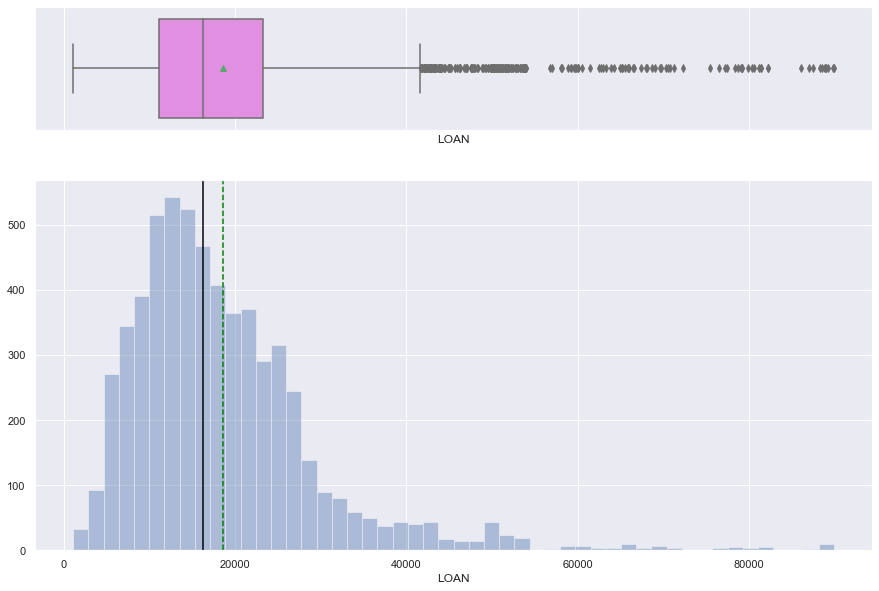

In [18]:
#### Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights __________**

None
None
None
None
None
None
None
None
None


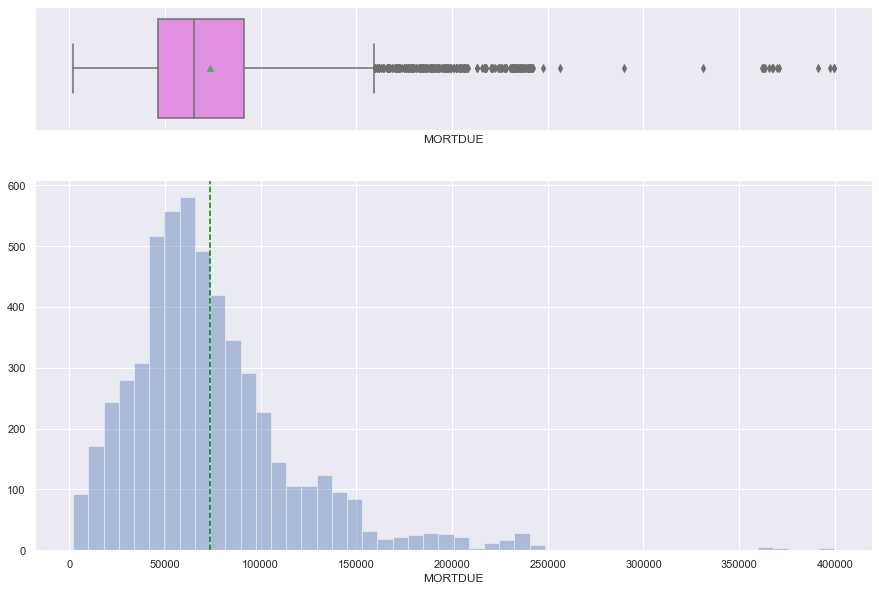

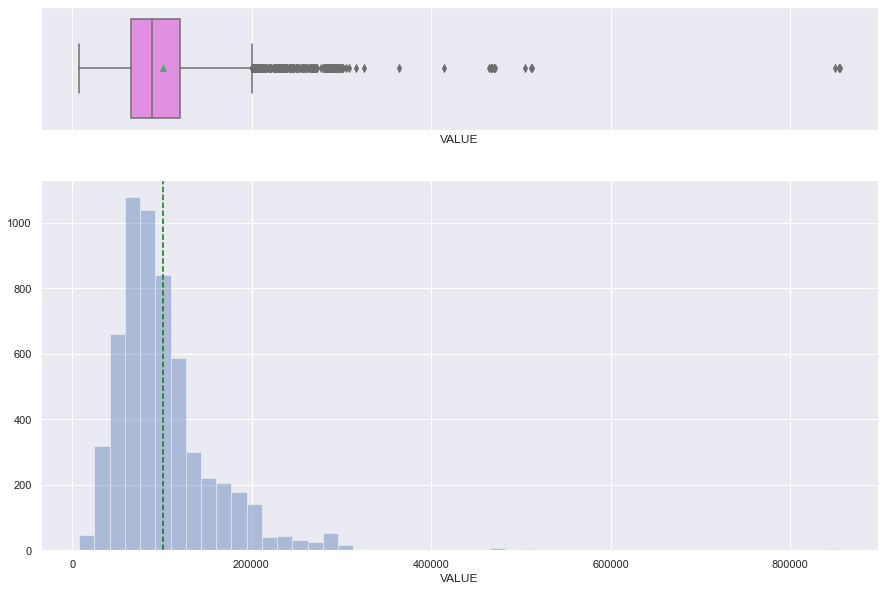

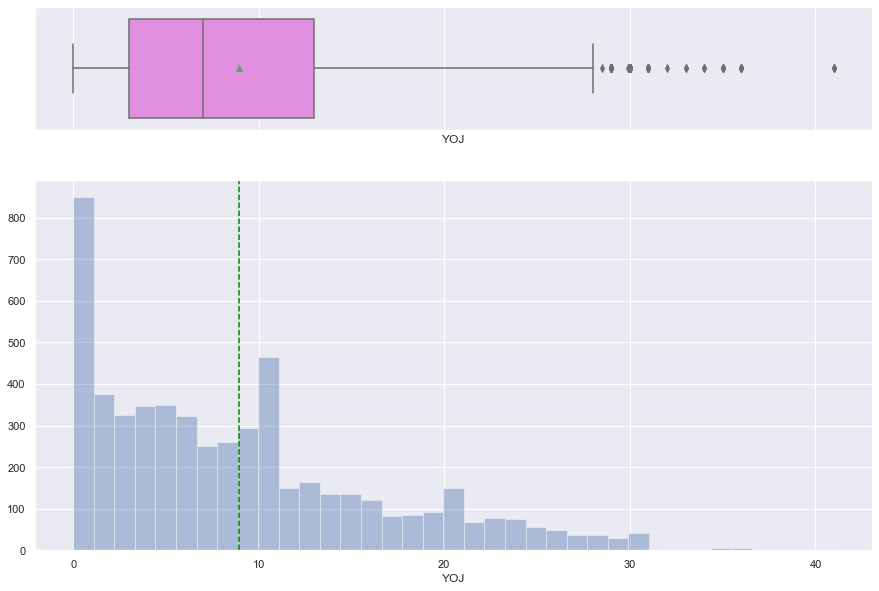

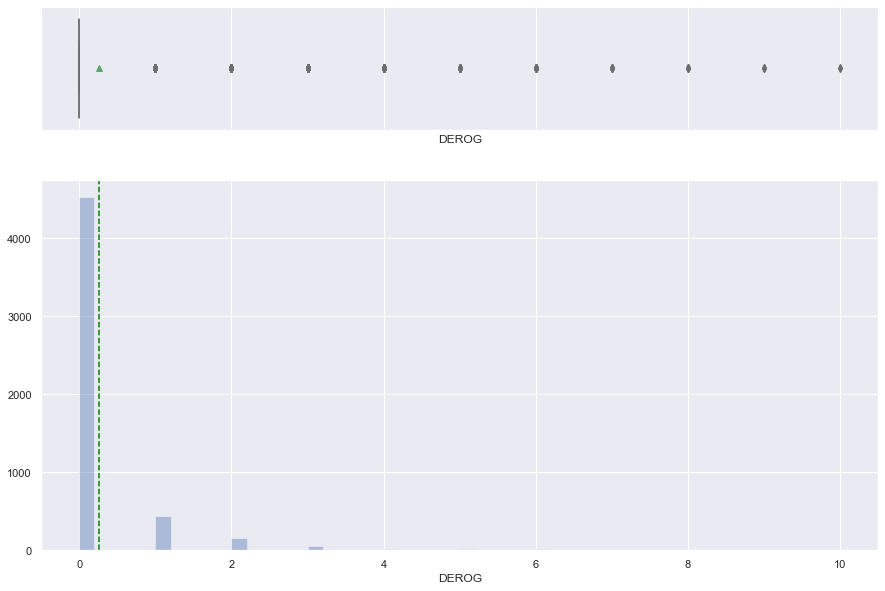

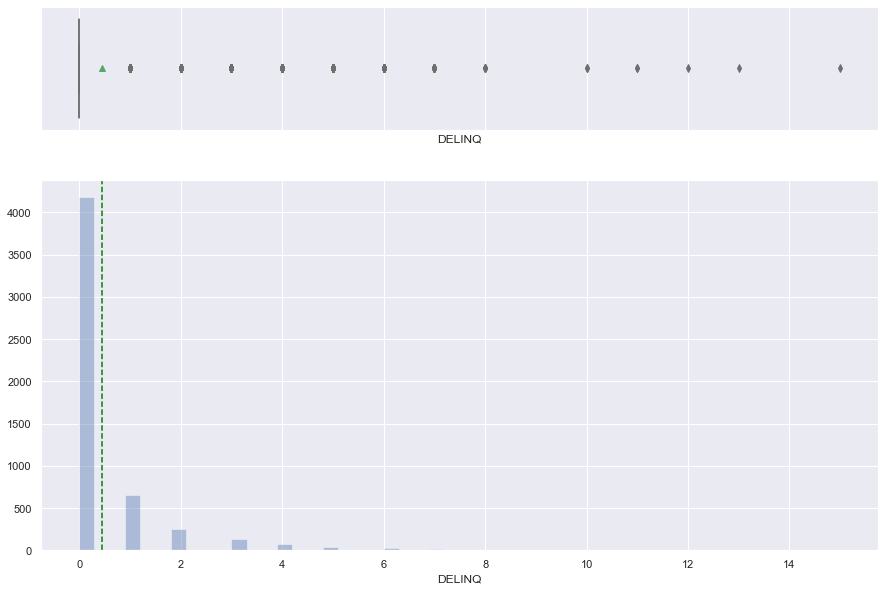

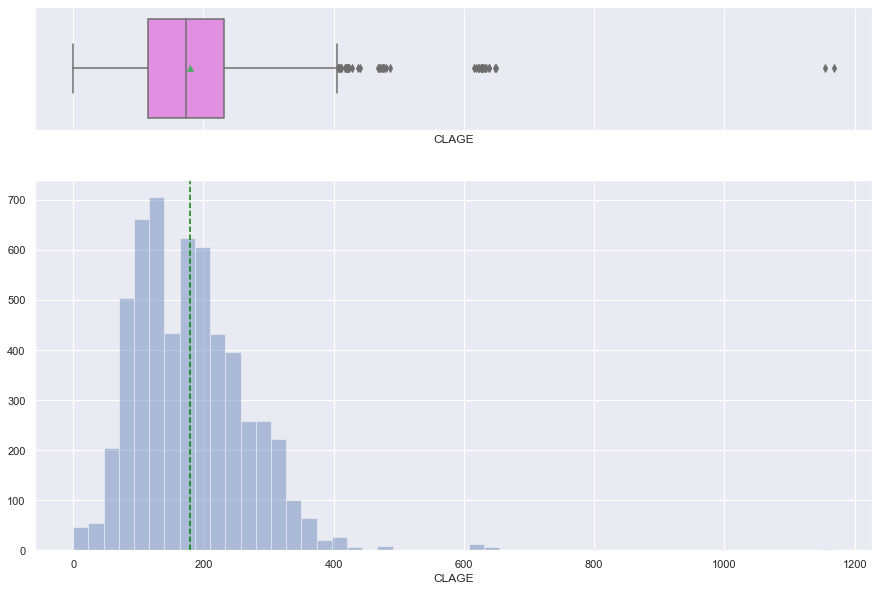

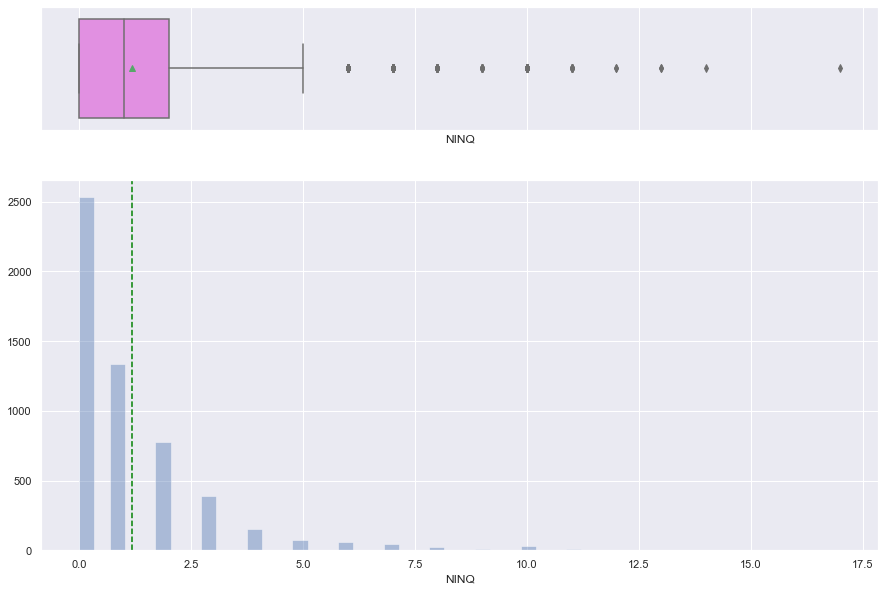

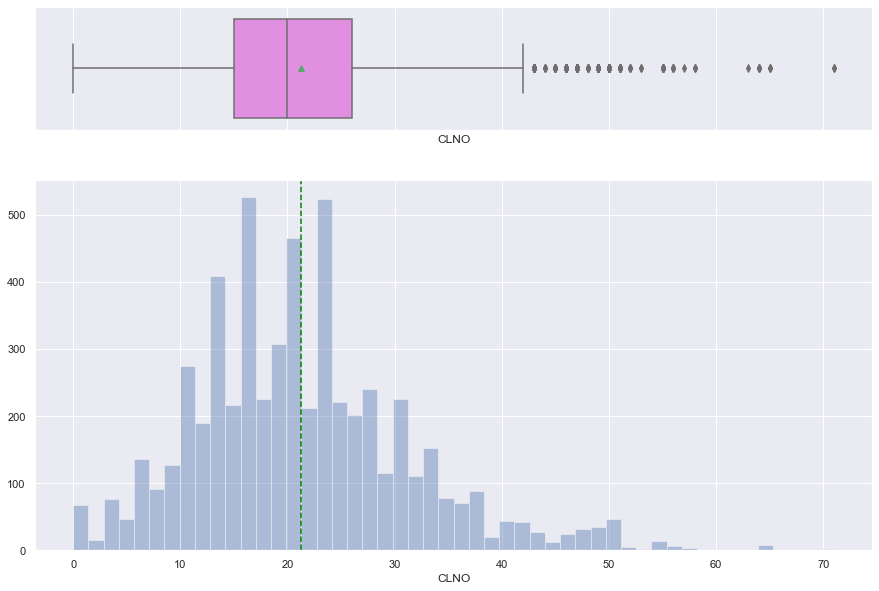

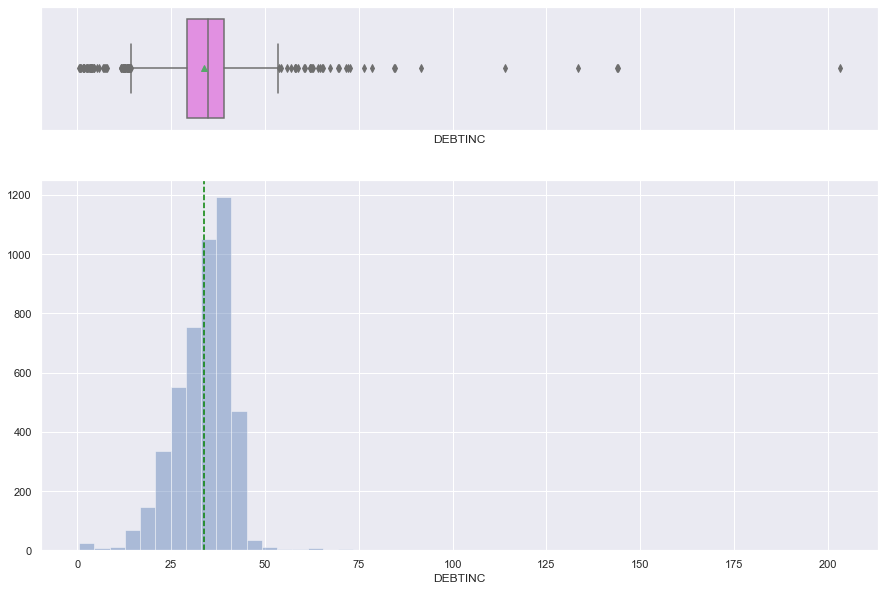

In [19]:
cols_num= data.select_dtypes(['float64'])

for i in cols_num:
    print(histogram_boxplot(data[i]))

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

**Insights ____________**

### **2. Univariate Analysis - Categorical Data**

In [20]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

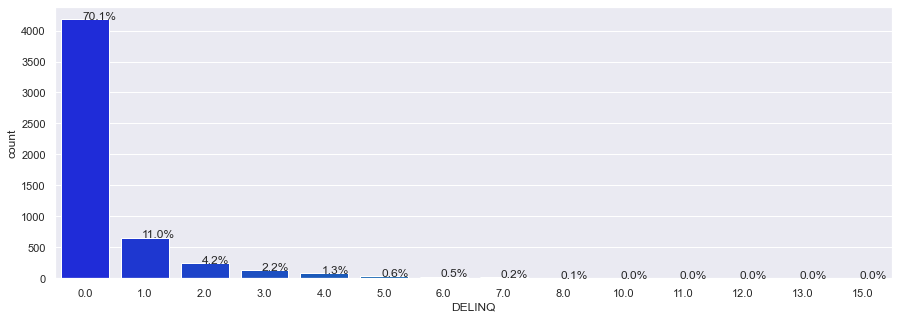

In [21]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights: 70.1% of loaners paid on time. 11% once, while 4.2%, 2.2% and 1.3% faulted thrice, four times and five times respectively.The remaining 11.2% faulted 6 times or more.**

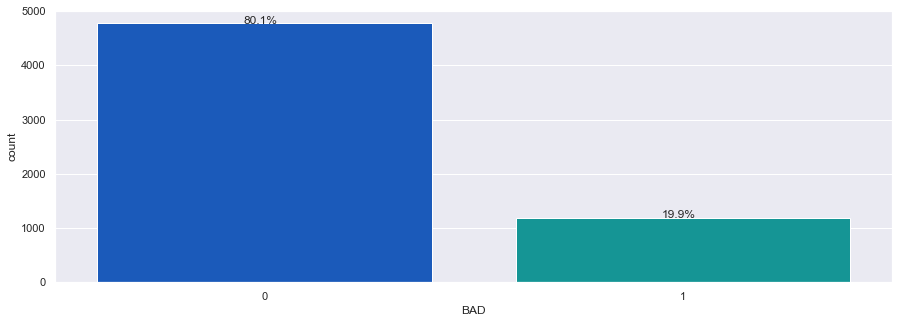

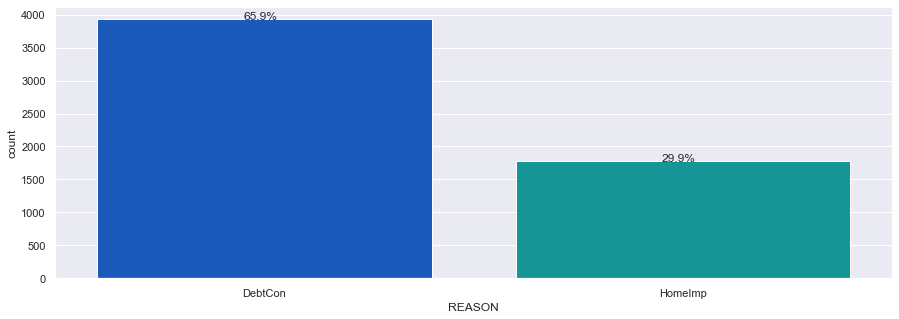

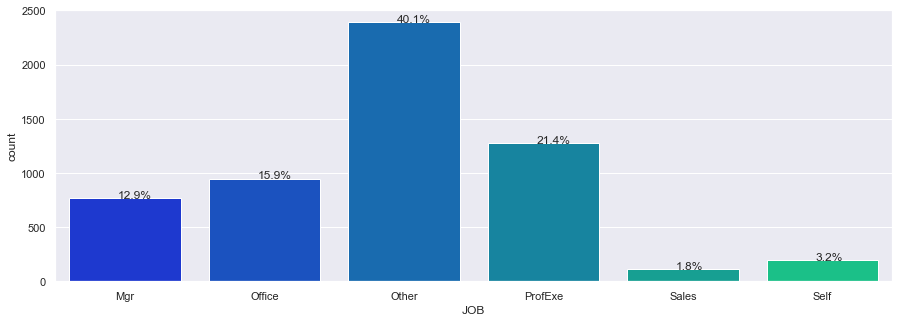

In [22]:
cols_cat

for i in cols_cat:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[i], palette='winter')
    perc_on_bar(ax, data[i])

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

**Insights: Over 80% of loaners repay their debt. Nearly 66% is for debt consolidation purposes and the majority (40.1%) of them occupy a job other than management, office, executives, sales or self employment. This is followed by executives at 21.4%, office workers with 15.9% and management at 12.9%. The remainder is split between sales and self employers.**

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

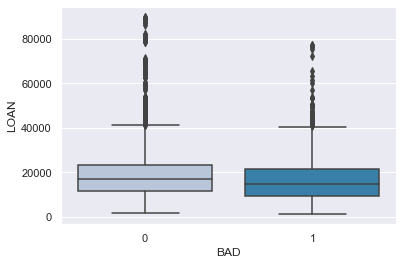

In [23]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights: The boxplots shows very similar values and IQR between people who repaid and those who didn't. However, there are more outliers for those who were able to repay their loans.**

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

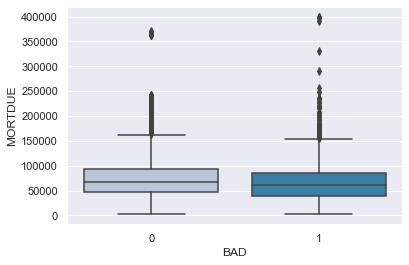

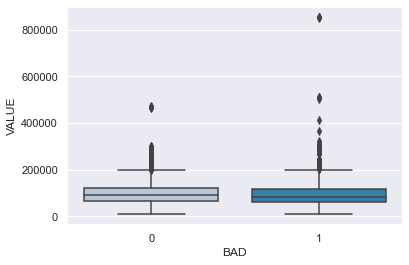

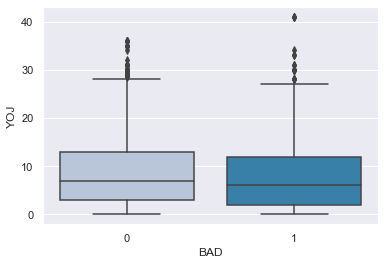

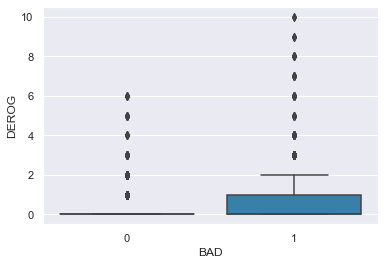

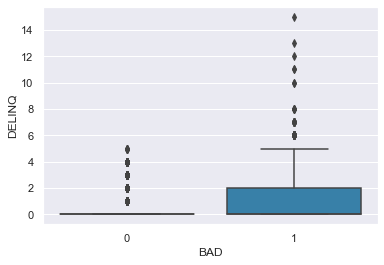

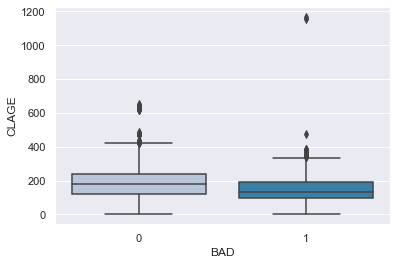

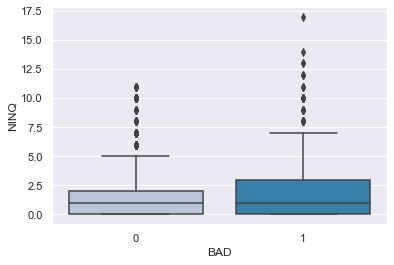

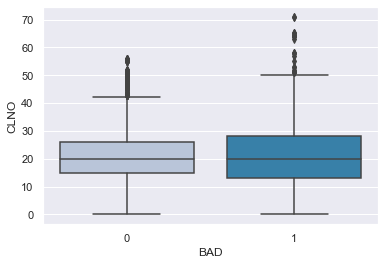

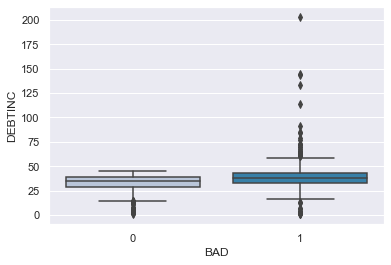

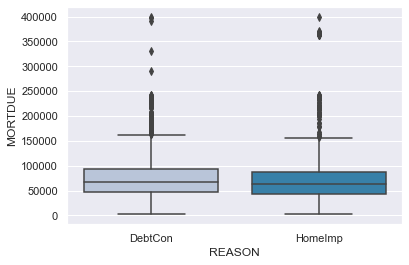

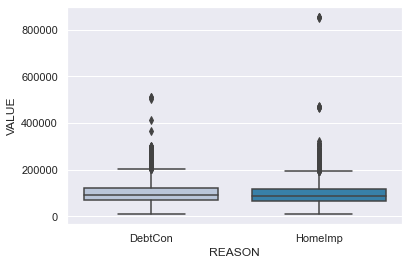

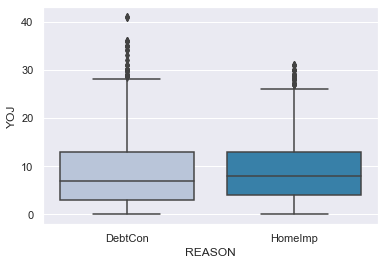

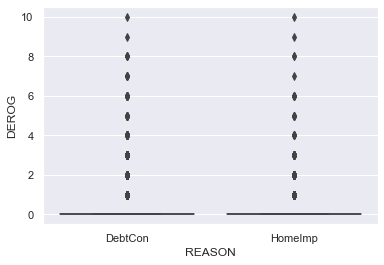

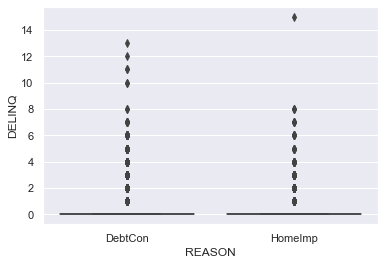

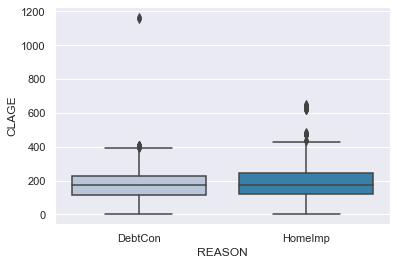

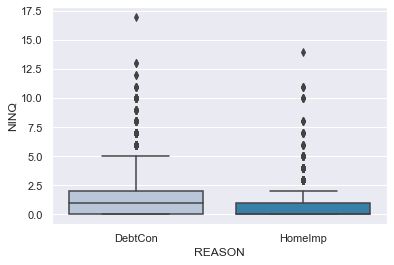

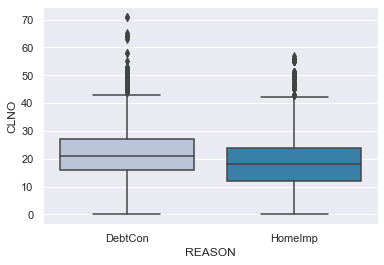

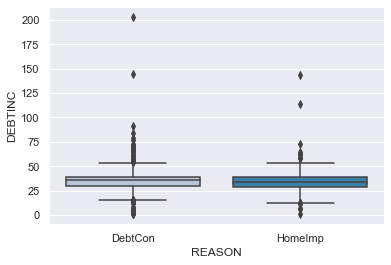

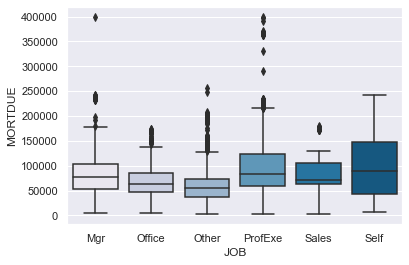

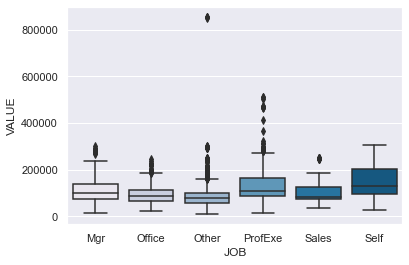

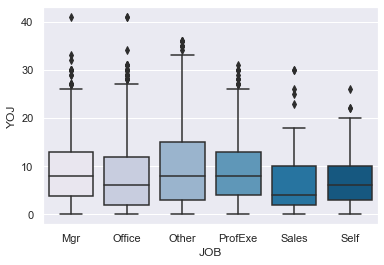

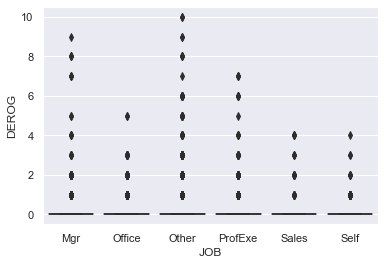

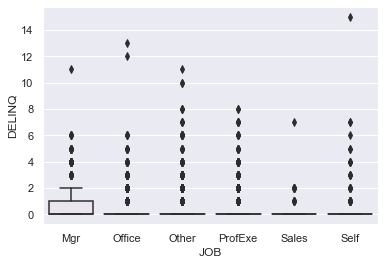

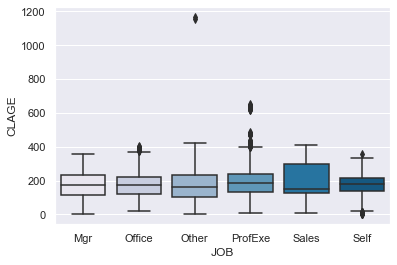

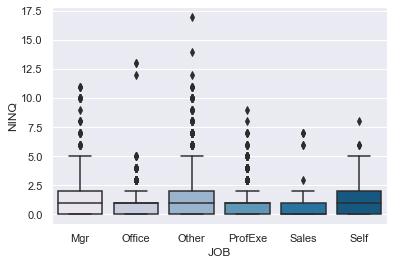

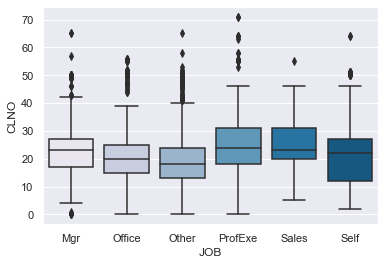

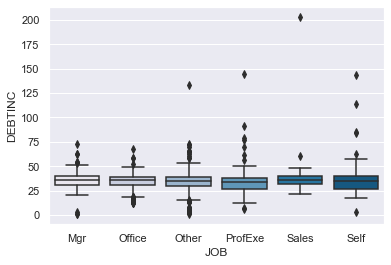

In [24]:
cols_cat
cols_num

for i in cols_cat:
    for j in cols_num:
        sns.boxplot(data[i], data[j], palette='PuBu')
        plt.show()

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

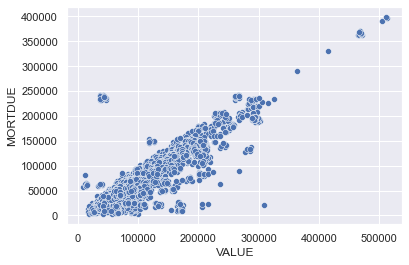

In [25]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights: _____**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

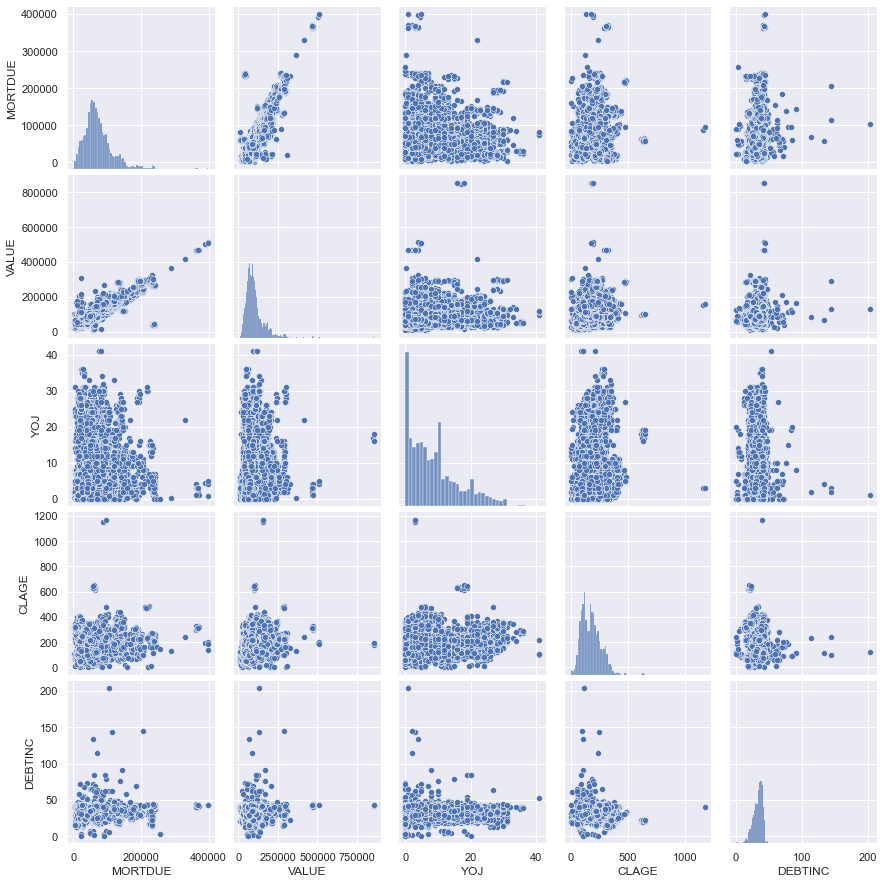

In [26]:
sns.pairplot(data.select_dtypes(['float64']).drop(['DEROG', 'DELINQ', 'NINQ','CLNO'], axis=1))

**Insights ____________**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [27]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


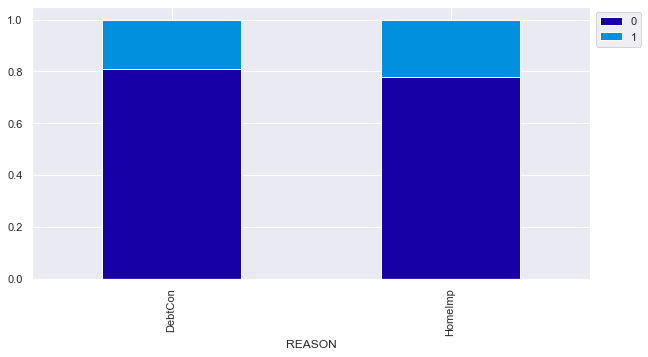

In [28]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights ____________**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


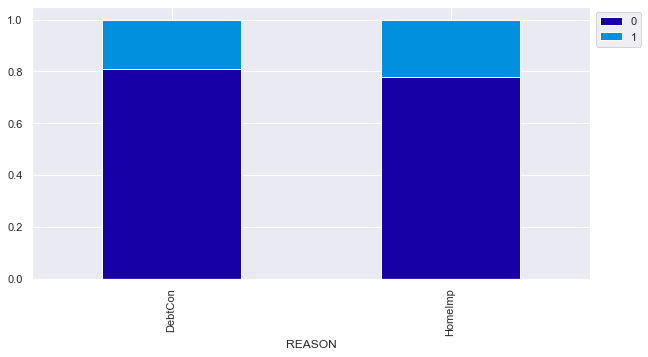

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


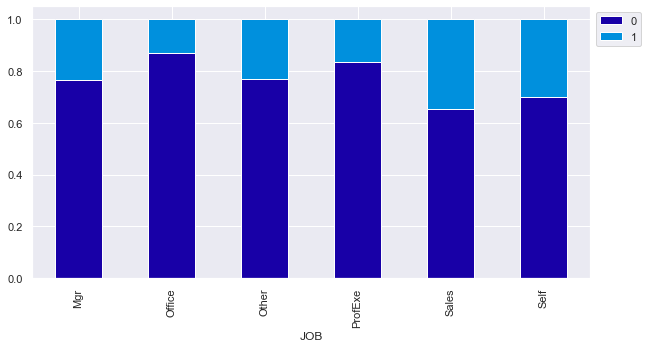

In [29]:
for i in cols_cat:
    if i == 'BAD':
        continue
    stacked_plot(data[i])

**Insights ___________________**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

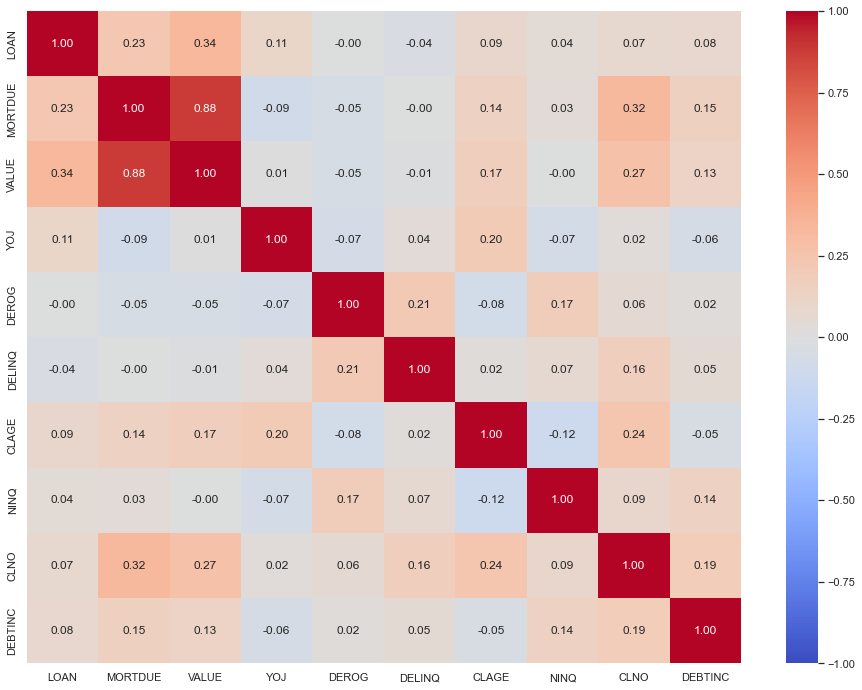

In [30]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True);

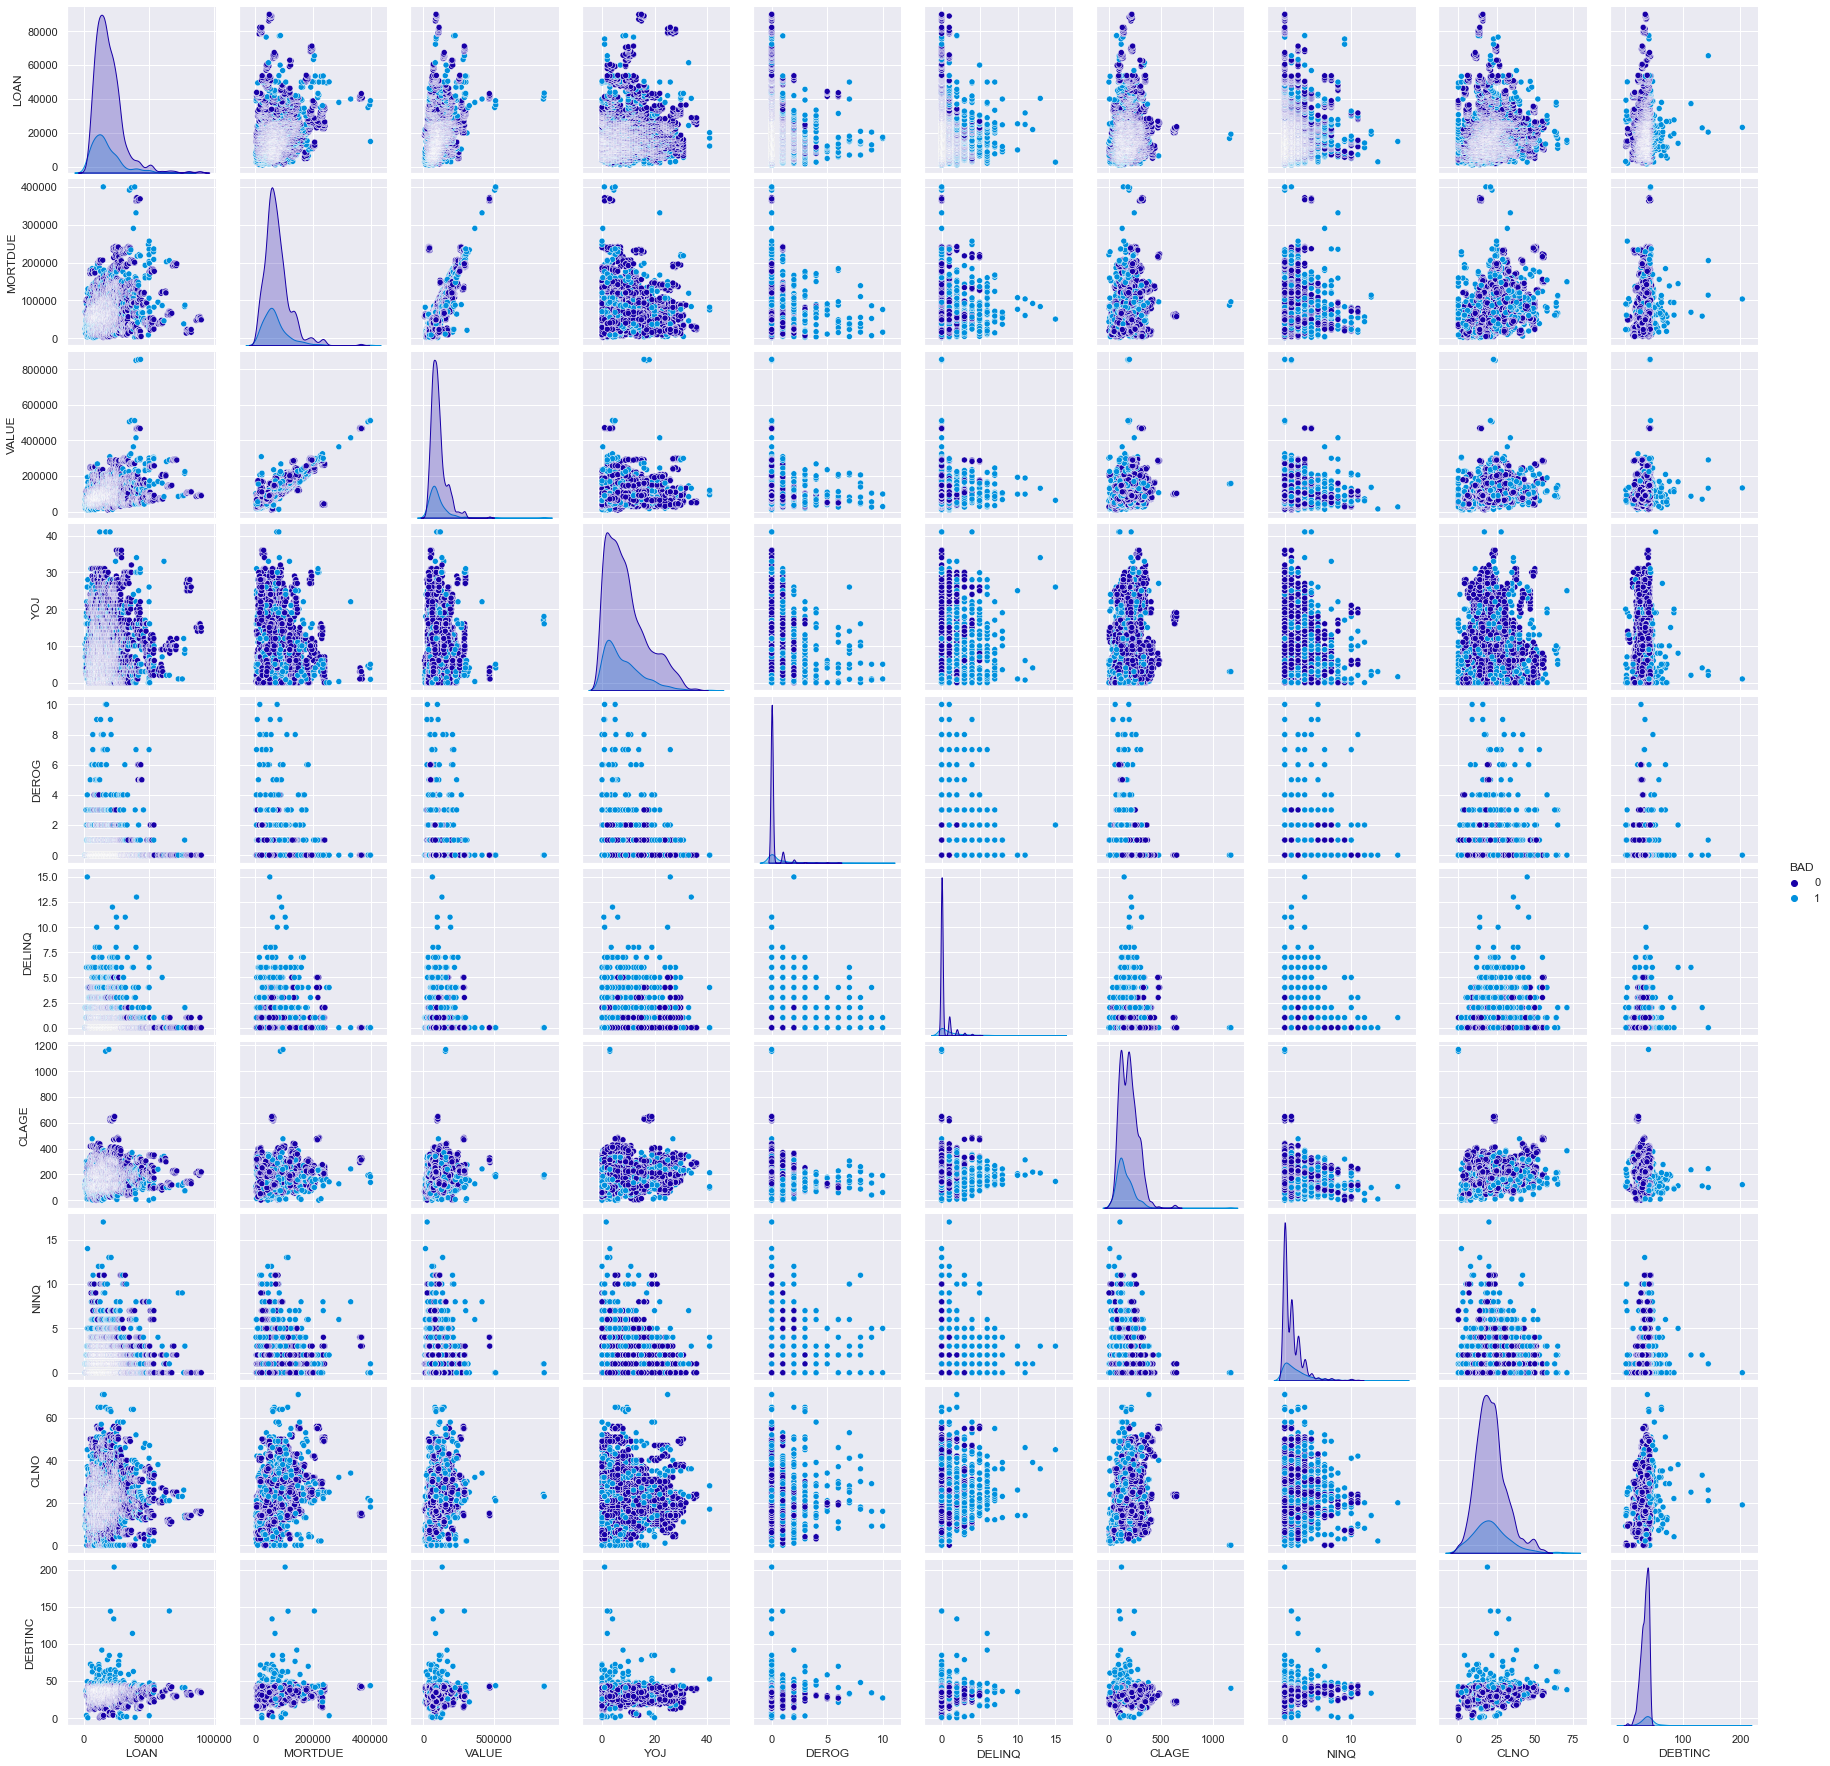

In [31]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code

sns.pairplot(data, hue='BAD')

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [32]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=np.quantile(df[col], 0.25) # 25th quantile
    Q3=np.quantile(df[col], 0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = np.min(df[col])  #define lower whisker
    Upper_Whisker = np.max(df[col])  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [33]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

#### Filling missing values in numerical columns with median and mode in categorical variables

In [34]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
for i in num_data:
    median = data[i].median()
    data[i] = data[i].fillna(median)


# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column]

#### **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?

Three classifiers will be considered:
1.	Logistic Regression (LR)
2.	Decision Tree (DT)
3.	Random Forest (RF)

Other classifiers, such as Naïve Bayes, Support Vector Machines (SVM), Adaptive Boosting or Radial Basis Functions Neural Networks (RBFNN), may be considered. 


**2. Overall solution design** - What is the potential solution design?

The overall solution design will evaluate each classifier and look at the best performance; that should be the model to adopt. To get to the best model performance, there will be an iterative process of hyperparameter tuning. The GridSearchCV will be employed, but other methods may be considered, such as Random Search, Informed Search, Bayesian Optimization or Tree-Structured Parzen estimators (TPE).

**3. Measures of success** - What are the key measures of success?

The primary measure of success will be leveraging the precision-recall curves to get the precision, recall and f1-scores of each model to measure the performance. There is the possibility of using ROC AUC curves instead of precision-recall, but precision-recall should perform better because our dataset is imbalanced (most loans are repaid). 



In [35]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = data.drop(columns=['BAD'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = data['BAD']

### **Splitting the data into 70% train and 30% test set, and scaling the data**

In [36]:
# Split the data into training and test set
# Remove _________ and complete the code

scaler=StandardScaler()
X_train1,X_test1,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=1)

In [37]:
#Scale the data
X_train=pd.DataFrame(scaler.fit_transform(X_train1), columns=X_train1.columns)
X_test=pd.DataFrame(scaler.transform(X_test1), columns=X_test1.columns)


### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [38]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [39]:
# Defining the Logistic regression model
# Remove _________ and complete the code
log_reg=LogisticRegression(random_state=1)

# Fitting the model on the training data 
# Remove _________ and complete the code

log_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3355
           1       0.73      0.33      0.46       817

    accuracy                           0.85      4172
   macro avg       0.79      0.65      0.68      4172
weighted avg       0.83      0.85      0.82      4172



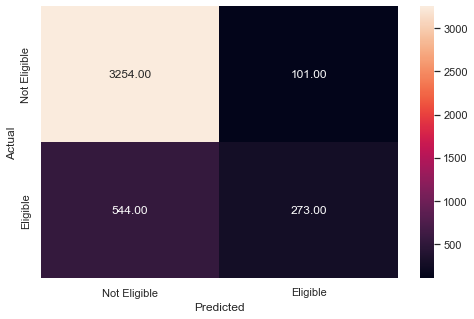

In [40]:
#Predict for train set
# Remove _________ and complete the code
y_pred_train_log = log_reg.predict(X_train)

#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train, y_pred_train_log)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1416
           1       0.70      0.28      0.40       372

    accuracy                           0.82      1788
   macro avg       0.77      0.62      0.65      1788
weighted avg       0.81      0.82      0.79      1788



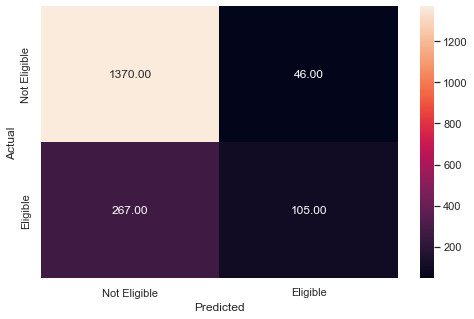

In [41]:
#Predict for test set
# Remove _________ and complete the code

y_pred_test_log = log_reg.predict(X_test)

#checking the performance on the test dataset
# Remove _________ and complete the code

metrics_score(y_test, y_pred_test_log)

**Observations: Accuracy on the train samples is 85% while the accuracy on test sample is 83%. **

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [42]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code


pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

DELINQ            0.771411
DEBTINC           0.588070
DEROG             0.507918
NINQ              0.279351
VALUE             0.131796
JOB_Self          0.117546
JOB_Sales         0.114869
REASON_HomeImp    0.101906
JOB_Other         0.086542
JOB_ProfExe       0.039200
YOJ              -0.052939
CLNO             -0.142591
MORTDUE          -0.159786
JOB_Office       -0.169099
LOAN             -0.211497
CLAGE            -0.425816
dtype: float64

In [43]:
#Feature Importance
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[i for i in abs(log_reg.coef_[0])]})
feature_importance.sort_values('feature_importance',ascending=False)

feature  feature_importance
5           DELINQ            0.771411
9          DEBTINC            0.588070
4            DEROG            0.507918
6            CLAGE            0.425816
7             NINQ            0.279351
0             LOAN            0.211497
11      JOB_Office            0.169099
1          MORTDUE            0.159786
8             CLNO            0.142591
2            VALUE            0.131796
15        JOB_Self            0.117546
14       JOB_Sales            0.114869
10  REASON_HomeImp            0.101906
12       JOB_Other            0.086542
3              YOJ            0.052939
13     JOB_ProfExe            0.039200

**Insights We can optimize the threshold by using a precision-recall curve. The metrics should improve. **

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

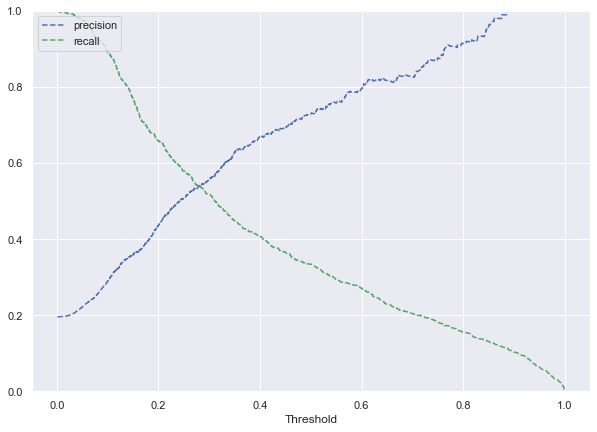

In [44]:
#Calcuate better threshold using Precision-Recall Curve

y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [45]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.280844142436652


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3355
           1       0.54      0.54      0.54       817

    accuracy                           0.82      4172
   macro avg       0.71      0.71      0.71      4172
weighted avg       0.82      0.82      0.82      4172



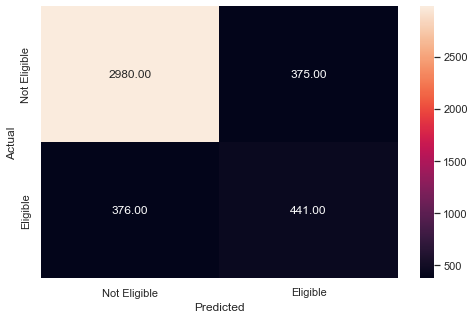

In [46]:
optimal_threshold1 = 0.280844142436652
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1416
           1       0.56      0.51      0.53       372

    accuracy                           0.81      1788
   macro avg       0.72      0.70      0.71      1788
weighted avg       0.81      0.81      0.81      1788



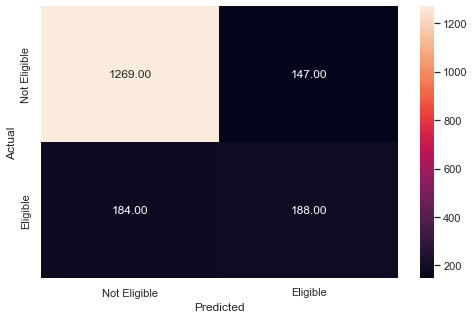

In [47]:
#Checking performance on the testing data
y_pred_test_log_tuned = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test_log_tuned[:,1]>optimal_threshold1)

**The optimal threshold did not improve the overall accuracy**

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

**Decision trees are not sensitive to outliers since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values. The intuitive answer is that a decision tree works on splits and splits aren't sensitive to outliers: a split only has to fall anywhere between two groups of points to split them.
Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features.**

In [48]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

dt = DecisionTreeClassifier(random_state=1, class_weight={0:0.2, 1:0.8})

In [49]:
#fitting Decision tree model
# Remove ___________ and complete the code
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



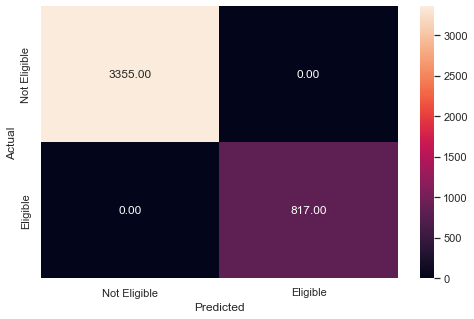

In [50]:
# Checking performance on the training data
# Remove ___________ and complete the code

y_pred_train_dt = dt.predict(X_train)
metrics_score(y_train,y_pred_train_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1416
           1       0.69      0.61      0.65       372

    accuracy                           0.86      1788
   macro avg       0.80      0.77      0.78      1788
weighted avg       0.86      0.86      0.86      1788



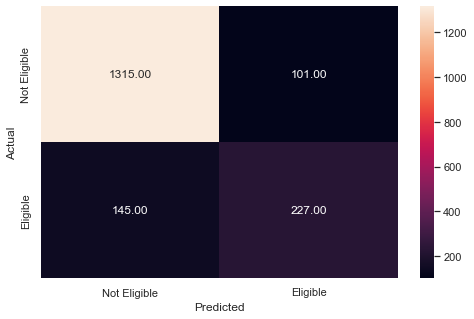

In [51]:
# Checking performance on the testing data
# Remove _________ and complete the code

y_pred_test_dt = dt.predict(X_test)
metrics_score(y_test,y_pred_test_dt)

**Insights There's overfitting on the train data as the accuracy 100% but 87% on the test data.**

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [52]:
# Choose the type of classifier. 
# Remove _________ and complete the code
dt_clf = DecisionTreeClassifier(random_state=1, class_weight={0:0.2, 1:0.8})


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer_dt = 'f1'


# Run the grid search
# Remove _________ and complete the code
grid_obj_dt = GridSearchCV(dt_clf, parameters, scoring=scorer_dt, cv=5)



# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj_dt = grid_obj_dt.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
dt_tuned = grid_obj_dt.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=7, min_samples_leaf=5, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3355
           1       0.68      0.84      0.75       817

    accuracy                           0.89      4172
   macro avg       0.82      0.87      0.84      4172
weighted avg       0.90      0.89      0.90      4172



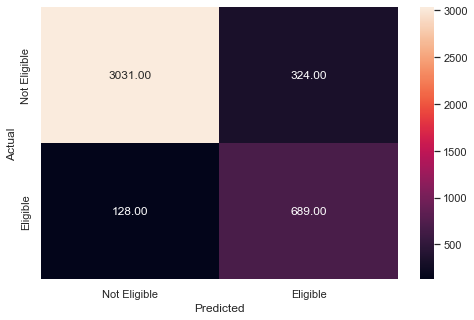

In [53]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_pred_train_dt_tuned = dt_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_dt_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.66      0.75      0.70       372

    accuracy                           0.87      1788
   macro avg       0.79      0.82      0.81      1788
weighted avg       0.87      0.87      0.87      1788



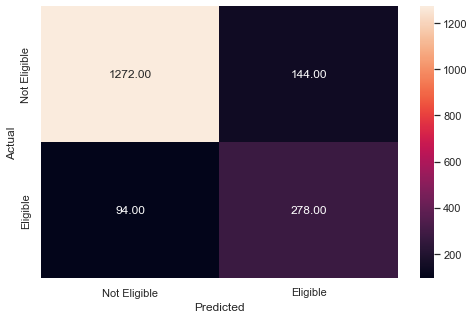

In [54]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

y_pred_test_dt_tuned = dt_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_dt_tuned)

**Insights accuracy is nearly the same for test and train data at 87-88%**

In [55]:
#Feature Importance
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':dt_tuned.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
9          DEBTINC        5.957378e-01
5           DELINQ        8.500307e-02
6            CLAGE        6.926333e-02
1          MORTDUE        4.595629e-02
7             NINQ        4.311035e-02
2            VALUE        3.773788e-02
3              YOJ        3.398368e-02
0             LOAN        2.754333e-02
8             CLNO        2.076777e-02
4            DEROG        1.377064e-02
10  REASON_HomeImp        1.295807e-02
12       JOB_Other        9.521285e-03
11      JOB_Office        4.646524e-03
15        JOB_Self        5.616451e-17
13     JOB_ProfExe        0.000000e+00
14       JOB_Sales        0.000000e+00

#### Plotting the Decision Tree

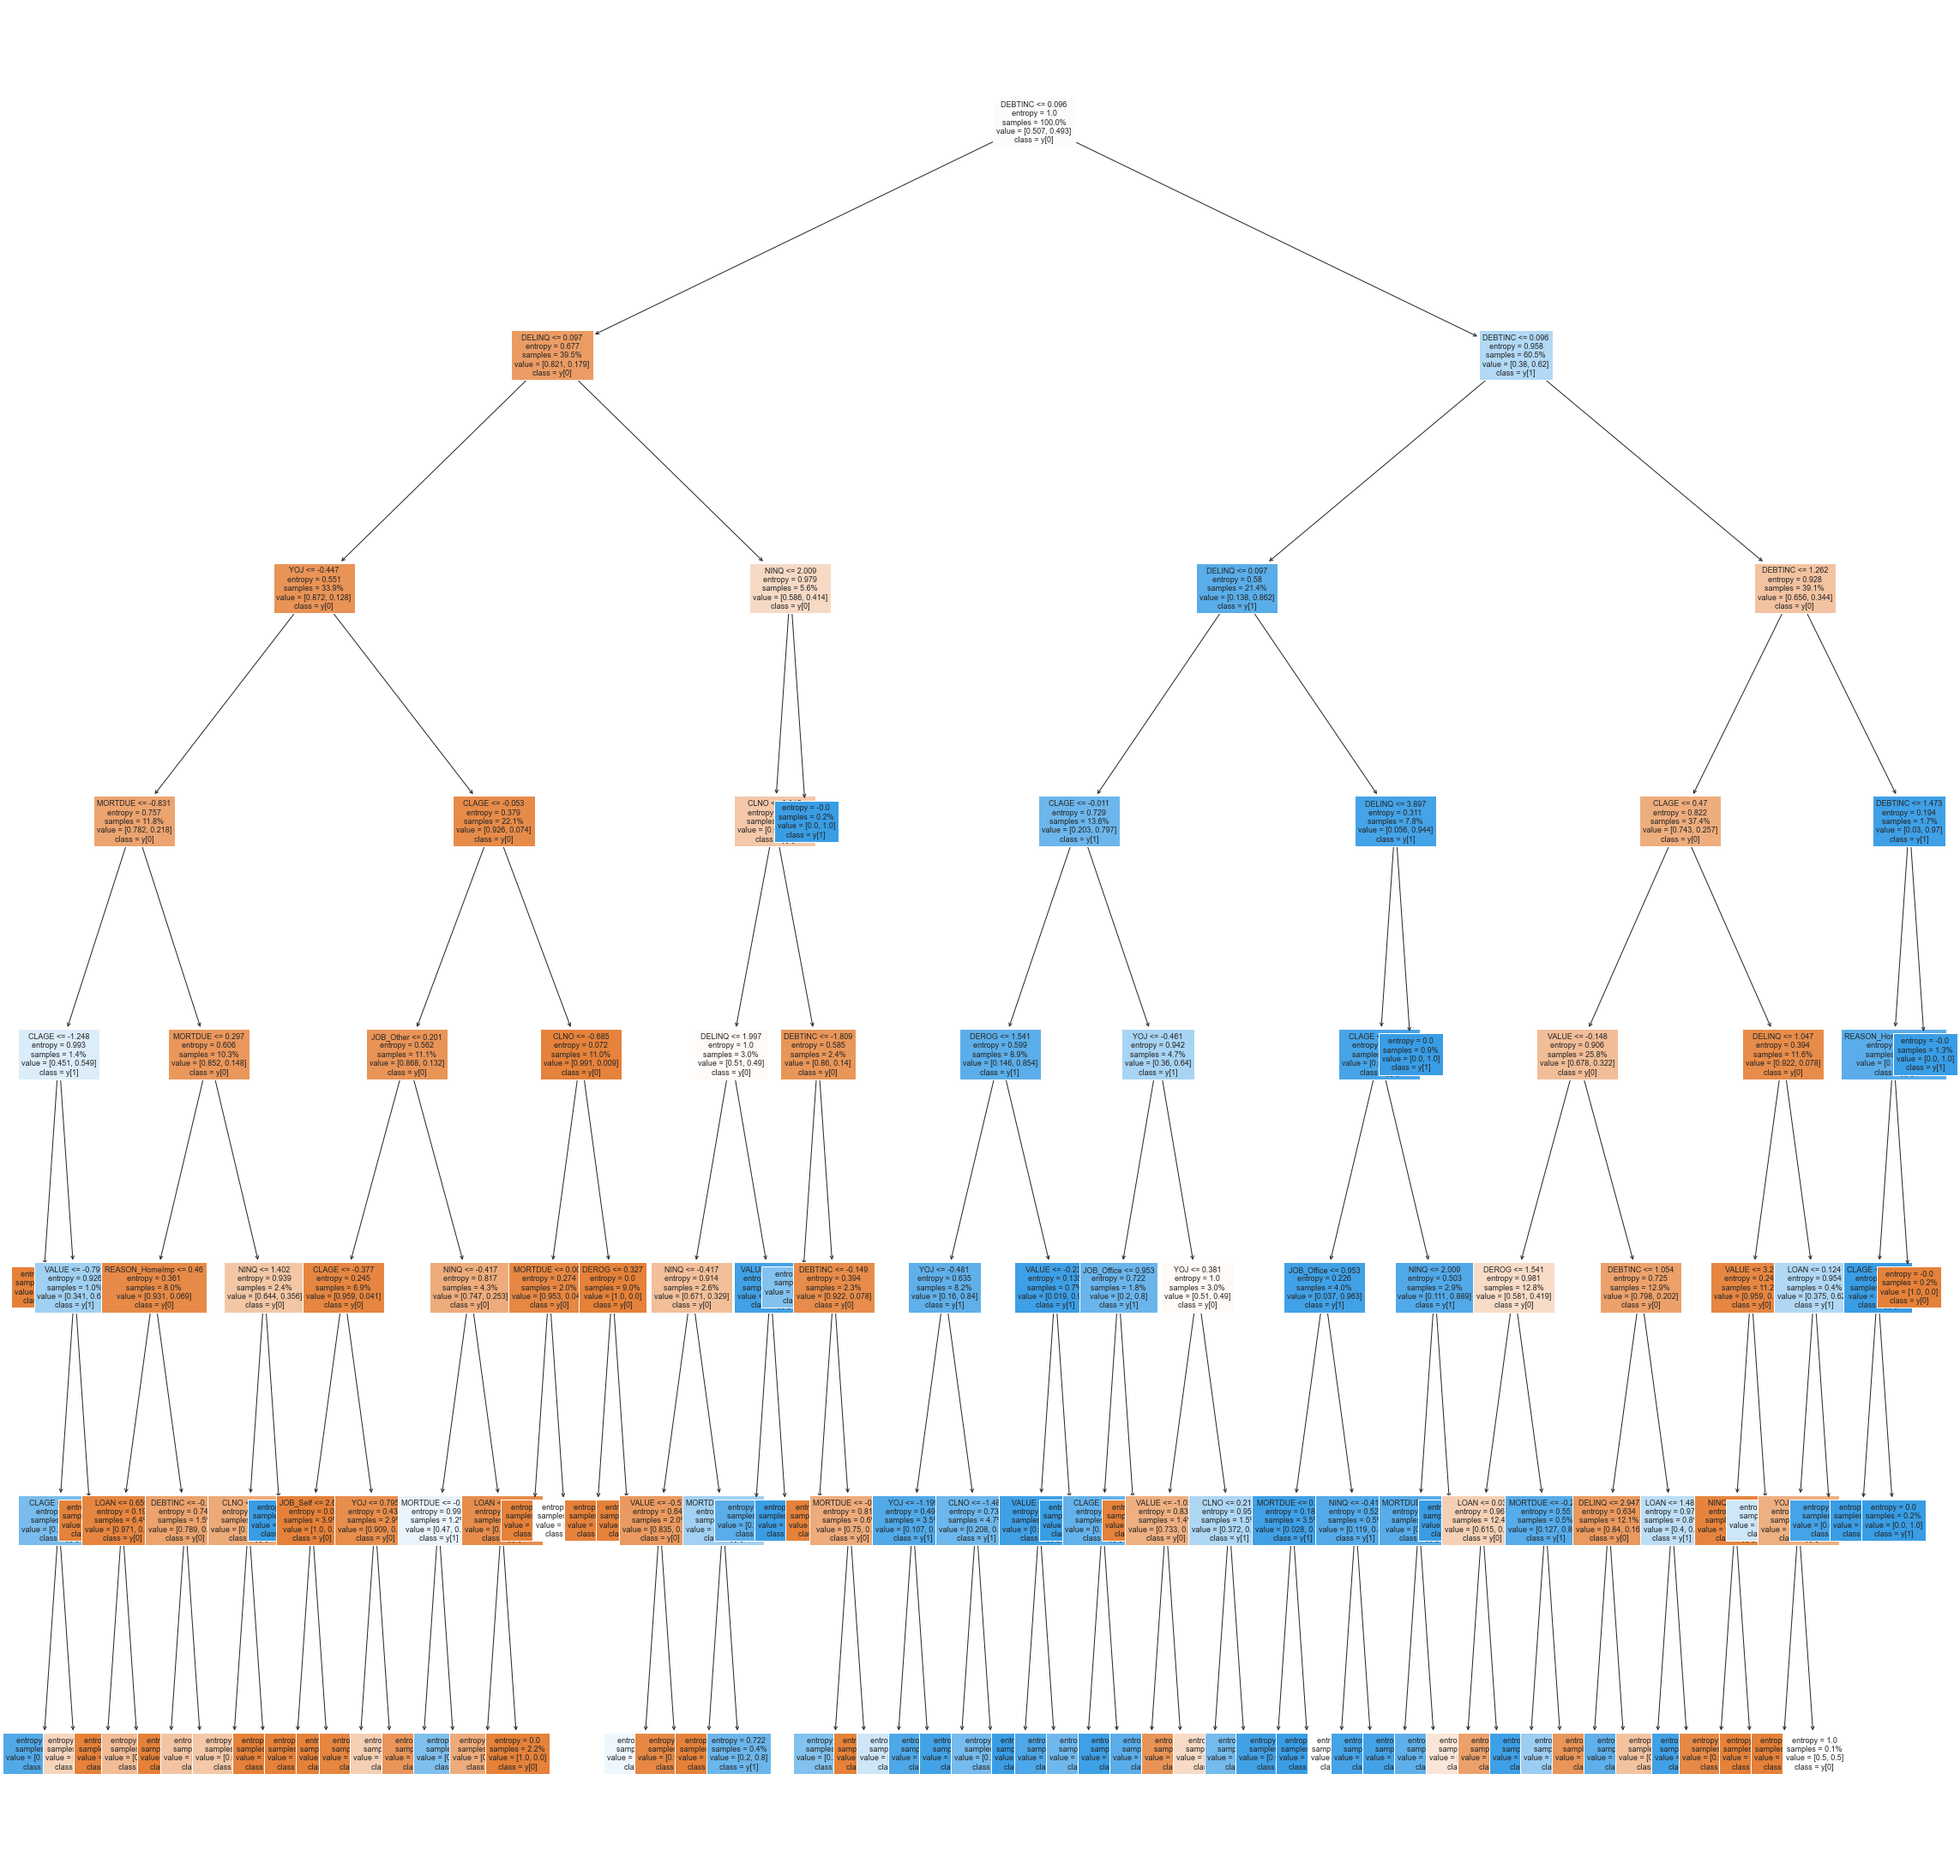

In [56]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code


features = list(X.columns)

plt.figure(figsize=(40,40))

tree.plot_tree(dt_tuned,feature_names=features,filled=True,fontsize=9,class_names=True, proportion=True)
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: 
-Here are the paths for the majority of loaners who repaid their debts:
    
    - DEBTINC <= 0.096, DELINQ <=1.047, NINQ <= 2.009, CLNO <= -1.484, regardless of LOAN
    - 0.096 < DEBTINC <= 1.23, CLAGE <= 0.277, regardless of VALUE
    - 0.096 < DEBTINC <= 1.23, CLAGE <= 0.277, DELINQ <= 1.047
    
- Here are the paths for the majority of loaners who defaulted:

    - DEBTINC <= 0.096, regardless of DELINQ, regardless of CLAG, regardless of YOJ and DEROG
    - DEBTINC >= 1.23, CLAGE <= 1.265, regardless of DEBTINC 

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [57]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



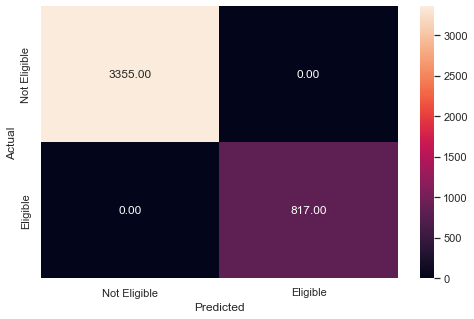

In [58]:
#Checking performance on the training data
# Remove _________ and complete the code
y_pred_train_rf = rf.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.69      0.78       372

    accuracy                           0.92      1788
   macro avg       0.91      0.83      0.87      1788
weighted avg       0.92      0.92      0.92      1788



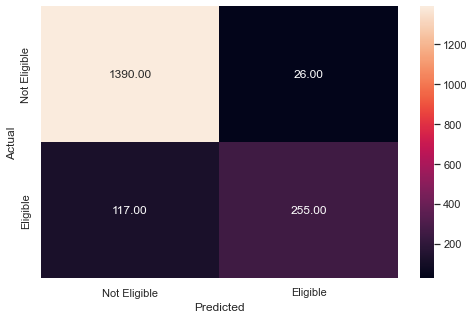

In [59]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test_rf = rf.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

**Observations: Data is overfitted as accuracy over train data is 100%. Accuracy of test data is 92%.**

### **Build a Random Forest model with Class Weights**

In [60]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rf2 = RandomForestClassifier(random_state=1, class_weight={0: 0.2, 1: 0.8})


# Fitting Random Forest model
# Remove _________ and complete the code

rf2.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



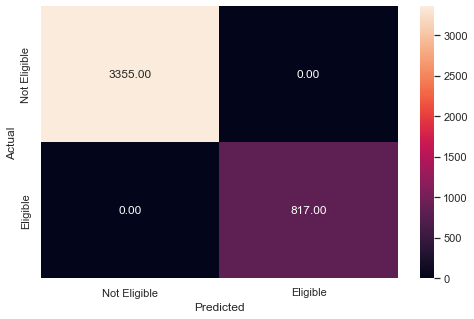

In [61]:
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train_rf2 = rf2.predict(X_train)
metrics_score(y_train, y_pred_train_rf2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.89      0.66      0.76       372

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



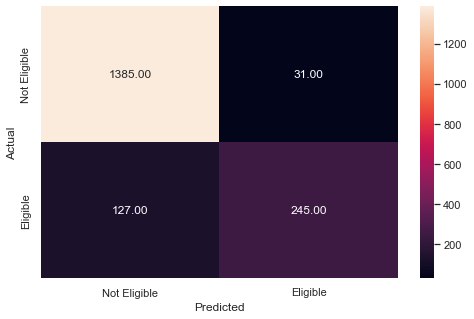

In [62]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test_rf2 = rf2.predict(X_test)
metrics_score(y_test, y_pred_test_rf2)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [63]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_clf = RandomForestClassifier(criterion="entropy", random_state=1, class_weight = {0:0.2, 1:0.8}) #We will not tune on the criterion hyperparameter as it was determined in DT that 'entropy' was the best for this data


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters_rf = {"n_estimators": [110, 120, 130, 140],
    "min_samples_leaf": [10, 15, 20, 25],
    "max_features": ['auto'],
    "max_samples": [0.9, 1],
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code

scorer_rf = 'f1'


# Run the grid search
# Remove _________ and complete the code
grid_obj_rf = GridSearchCV(rf_clf, parameters_rf, scoring=scorer_rf, cv=5)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj_rf = grid_obj_rf.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_tuned = grid_obj_rf.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_samples=0.9, min_samples_leaf=10, n_estimators=110,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3355
           1       0.74      0.91      0.81       817

    accuracy                           0.92      4172
   macro avg       0.86      0.92      0.88      4172
weighted avg       0.93      0.92      0.92      4172



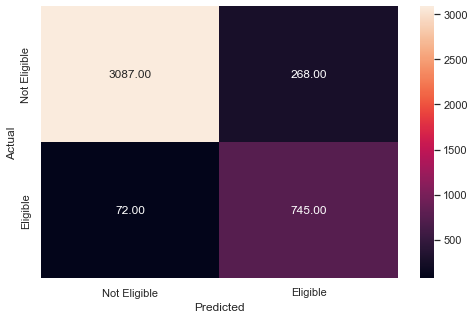

In [64]:
# Checking performance on the training data
# Remove _________ and complete the code
y_pred_train_rf_tuned = rf_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1416
           1       0.72      0.78      0.75       372

    accuracy                           0.89      1788
   macro avg       0.83      0.85      0.84      1788
weighted avg       0.90      0.89      0.89      1788



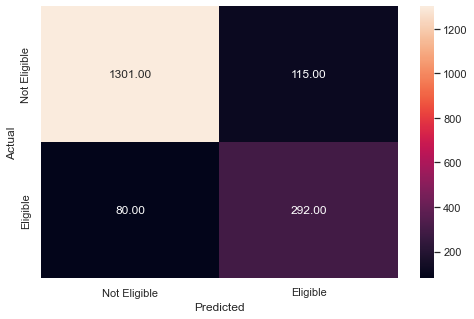

In [65]:
# Checking performace on test dataset
# Remove _________ and complete the code

y_pred_test_rf_tuned = rf_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

**Insights: Less overfitting as accuracy of train data is now 92%, but accuracy of test data is 89%. This model gives more confidence as the untuned version as it does not pick up the outliers and noises.**

#### Plot the Feature importance of the tuned Random Forest

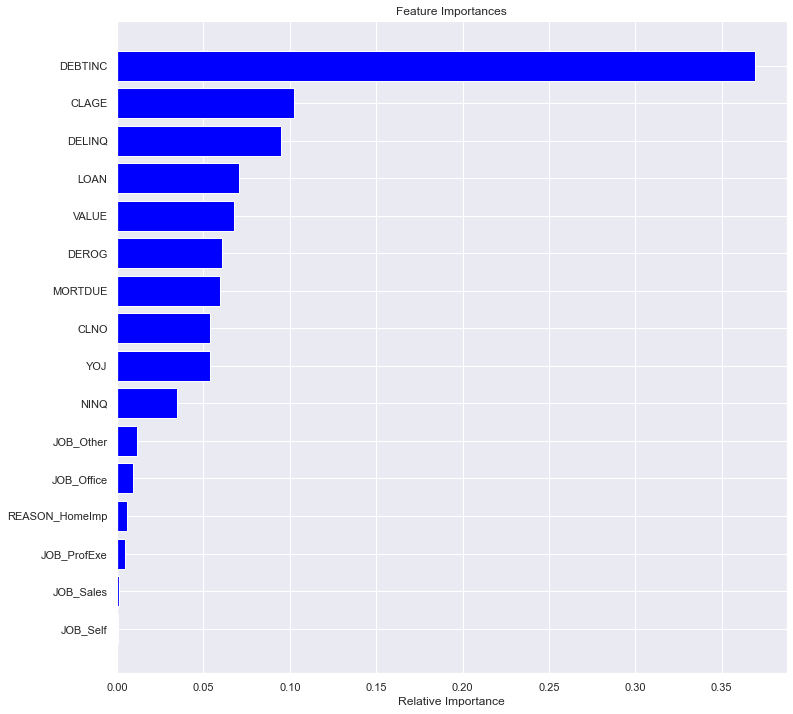

In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':rf_tuned.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
9          DEBTINC            0.369193
6            CLAGE            0.102267
5           DELINQ            0.094659
0             LOAN            0.070614
2            VALUE            0.067892
4            DEROG            0.060518
1          MORTDUE            0.059468
8             CLNO            0.054077
3              YOJ            0.054043
7             NINQ            0.034486
12       JOB_Other            0.011785
11      JOB_Office            0.009419
10  REASON_HomeImp            0.005664
13     JOB_ProfExe            0.004458
14       JOB_Sales            0.001033
15        JOB_Self            0.000425

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Build a KNN Classifier**

In [68]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2,20,2), 'weights':['uniform','distance'], 'p':[1,2]}

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='f1', cv=5)

model_knn=grid_knn.fit(X_train,y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')


In [69]:
#Fit the KNN model on the scaled training data
knn.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3355
           1       0.99      0.58      0.73       817

    accuracy                           0.92      4172
   macro avg       0.95      0.79      0.84      4172
weighted avg       0.92      0.92      0.91      4172



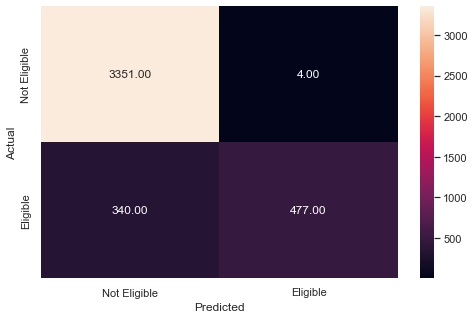

In [70]:
#Make predictions on the scaled training data and check the performance (using metrics_score function)

y_pred_train_knn = knn.predict(X_train) 
metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1416
           1       0.99      0.40      0.57       372

    accuracy                           0.88      1788
   macro avg       0.93      0.70      0.75      1788
weighted avg       0.89      0.88      0.85      1788



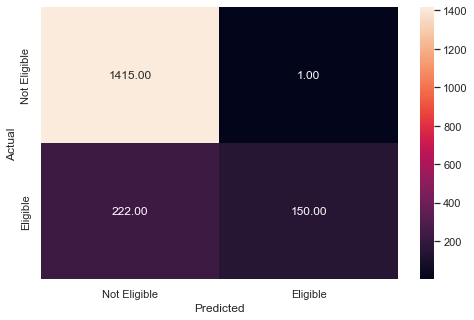

In [71]:
#Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test_knn = knn.predict(X_test)
metrics_score(y_test, y_pred_test_knn)

In [72]:
#Feature Importance
#Impossible


### **Build a Support Vector Machine Classifier**

In [73]:
svc = SVC(random_state=1)
svc.fit(X_train,y_train)


SVC(random_state=1)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3355
           1       0.98      0.47      0.64       817

    accuracy                           0.90      4172
   macro avg       0.94      0.74      0.79      4172
weighted avg       0.91      0.90      0.88      4172



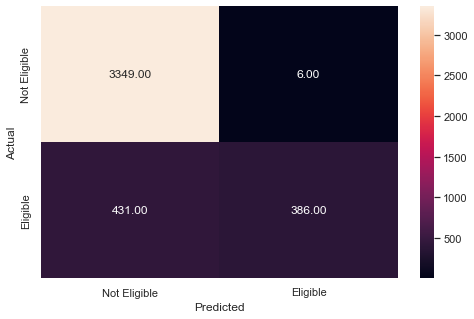

In [74]:
y_pred_train_svc = svc.predict(X_train)

metrics_score(y_train, y_pred_train_svc)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1416
           1       0.97      0.36      0.53       372

    accuracy                           0.86      1788
   macro avg       0.91      0.68      0.72      1788
weighted avg       0.88      0.86      0.84      1788



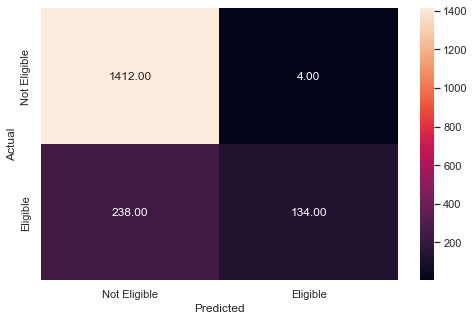

In [75]:
y_pred_test_svc = svc.predict(X_test)

metrics_score(y_test, y_pred_test_svc)

### **Tuning SVM**

In [76]:
svc_clf = SVC(random_state=1, class_weight={0:0.2, 1:0.8}) 

param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
                 }

scorer_svc = 'f1'
 
grid_svc = GridSearchCV(svc_clf, param_grid_svc, scoring=scorer_svc, refit = True, verbose = 1, cv=5)

grid_svc = grid_svc.fit(X_train, y_train)

svc_tuned = grid_svc.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
svc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


SVC(C=1, class_weight={0: 0.2, 1: 0.8}, gamma=1, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3355
           1       0.92      0.99      0.95       817

    accuracy                           0.98      4172
   macro avg       0.96      0.98      0.97      4172
weighted avg       0.98      0.98      0.98      4172



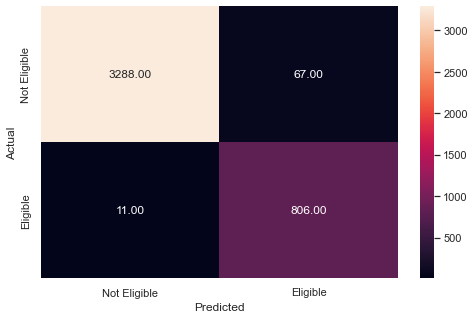

In [77]:
y_pred_train_svc_tuned = svc_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_svc_tuned)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1416
           1       0.81      0.93      0.86       372

    accuracy                           0.94      1788
   macro avg       0.89      0.94      0.91      1788
weighted avg       0.94      0.94      0.94      1788



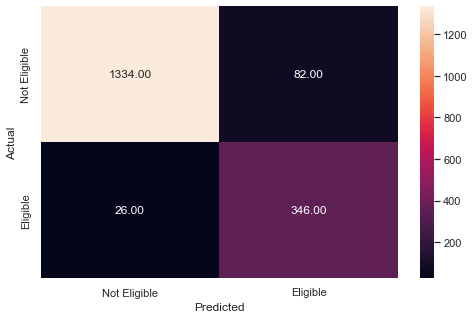

In [78]:
y_pred_test_svc_tuned = svc_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_svc_tuned)

In [79]:
#Feature Importance

feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':permutation_importance(svc_tuned, X_test, y_test,random_state=1).importances_mean.argsort()})
feature_importances.sort_values('feature_importance',ascending=True)



features  feature_importance
7             NINQ                   0
11      JOB_Office                   1
10  REASON_HomeImp                   2
8             CLNO                   3
2            VALUE                   4
3              YOJ                   5
13     JOB_ProfExe                   6
4            DEROG                   7
14       JOB_Sales                   8
5           DELINQ                   9
12       JOB_Other                  10
6            CLAGE                  11
15        JOB_Self                  12
9          DEBTINC                  13
0             LOAN                  14
1          MORTDUE                  15

### **Comparing Model Performances**

In [80]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [81]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [82]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [83]:
# Make the list of all the model names 

models = [log_reg, dt_tuned, rf_tuned, knn, svc, svc_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [84]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['LR', 'Tuned DT', 'Tuned RF', 'Tuned kNN', 'SVM', 'Tuned SVM'],
                                        'Overall_Average_Accuracy': np.array([sum(x) for x in zip(acc_train, acc_test)])/2,
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Overall_Average_Accuracy  Train_Accuracy  Test_Accuracy  \
0         LR                  0.835171        0.845398       0.824944   
1   Tuned DT                  0.879275        0.891659       0.866890   
2   Tuned RF                  0.904722        0.918504       0.890940   
3  Tuned kNN                  0.896413        0.917546       0.875280   
4        SVM                  0.879954        0.895254       0.864653   
5  Tuned SVM                  0.960451        0.981304       0.939597   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0      0.334149     0.282258         0.729947        0.695364  
1      0.843329     0.747312         0.680158        0.658768  
2      0.911873     0.784946         0.735439        0.717445  
3      0.583843     0.403226         0.991684        0.993377  
4      0.472460     0.360215         0.984694        0.971014  
5      0.986536     0.930108         0.923253        0.808411

**Insights: Tuned kNN seems to have better average accuracy than the others, although Tuned random forest comes close.**

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?